

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We are goint to analyze a dataset about 10,000 movies collected from the TMDb movie database including user ratings ,revenue data and some basic informations,Published by kaggle ,I decided to conduct some analyzes to find out the most important reasons for the success of movies


### Question(s) for Analysis

>1-Which movie has the Highest and Lowest (budget/profit)?                                                                      
>2-Movies genres released (Year to Year)?                                                                                                        
>3-Which movies genres need to be focus on ( users vote/profit )?                                                                                      
>4-Which is more common, Long or short moive?                                                                                                                             
>5-Which Directors are the most successful?                                                                                                          


In [9]:
#importing liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
#Reading the CSV file
df_TMDB=pd.read_csv('tmdb-movies.csv')
#print first two rows from dataset.
df_TMDB.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df_TMDB.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [12]:
df_TMDB.shape

(10866, 21)

In [13]:
#printing dataset summery
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [14]:
#checking unique values
df_TMDB.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [15]:
#Dataset statistics summery.
df_TMDB.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
#checking for zero values wich apper in the statistics summery
(df_TMDB==0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [17]:
#checking Null values
df_TMDB.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
#checking duplicated rows
df_TMDB.duplicated().sum()

1

# Observation from TMDB-Movies Dataset.


>1-There is a large Null values in some columns like" homepage , tagline , production_companies",which may result in misleading insights when analyzed                                                                                               
>2-There is only one duplicated row.  
>3-Values in Some columns need to be split, Like " cast ,director, genres ".                                                     
>4-There is less than 0.3% zero values in runtime.                                                                              
>5-There are almost 60% zero values in columns" budget,revenue,budget_adj,revenue_adj", which will be challenge when analyzing the financial performance  


<a id='wrangling'></a>
## Data Wrangling



### Will start by loading liberies and our CSV file. 

In [19]:
#importing liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [20]:
#Reading the CSV file
df_TMDB=pd.read_csv('tmdb-movies.csv')
#print first two rows from dataset.
df_TMDB.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08



### Data Cleaning

 


### Removing irrelevant columns and dropping missing value.

>Removing unrelated columns to the analysis  



In [21]:
#checking Null values
df_TMDB.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>As there is large Null values in some columns like" imdb_id ,homepage ,tagline ,keywords ,overview ,production_companies" which may result in misleading insight, So i decided to drop them.

In [22]:
#drop unused columns 
df_TMDB.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)

In [23]:
#confirm the action done.
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [24]:
# checking missing values in rows.
df_TMDB.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

>As there is a small values of Null not exceeding 0.7% ,so we can drop it from the analysis.

In [25]:
df_TMDB.dropna(inplace=True)

In [26]:
#confirming drop Null action.
df_TMDB.isnull().sum()  

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Data Cleaning - Cleaning Duplicates
>There is only one duplicate row so i decided to drop it as it will not impact the analysis.

In [27]:
#checking for duplicates.
df_TMDB.duplicated().sum()

1

In [28]:
#drop duplicates.
df_TMDB.drop_duplicates(inplace=True)

In [29]:
#confirming drop duplicates action.
df_TMDB.duplicated().sum()

0

### Data Cleaning - Zero Values

>As perviously, we noticed
 that almost 60% of the movies with Zero revenues and  budgets which lead me not to drop the whole columns which may affects on another important data in other columns and also decided not to use the median or mean to replace those values as this might give us inaccurate insight mean, while the actual figures of those movies may in fact be larger or smaller.
so i decided to create new dataframe for non zero values , will use it in the finantial impact and regarding "runtime" zero values it's ok to drop the zero values as it not exceeding 0.3%

In [30]:
#checking for Zero values
(df_TMDB==0).sum() 

id                   0
popularity           0
budget            5578
revenue           5888
original_title       0
cast                 0
director             0
runtime             28
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5578
revenue_adj       5888
dtype: int64

In [31]:
#dropping Zero values 
Zero_runtime=df_TMDB.query('runtime == 0').index
df_TMDB.drop(Zero_runtime,inplace=True)

In [32]:
#confirming drop Zero values action.
(df_TMDB==0).sum()

id                   0
popularity           0
budget            5553
revenue           5860
original_title       0
cast                 0
director             0
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5553
revenue_adj       5860
dtype: int64

### Data Cleaning-splitting out filed in " cast ,director, genres "
>Before creating the new dataframe for non zero values, i'll split the values in columns " cast ,director, genres "

In [33]:
#splitting out the cast field
df_TMDB_cast = df_TMDB
df_TMDB_cast['cast'] = df_TMDB_cast['cast'].apply(lambda x: x.split("|")[0])

In [34]:
df_TMDB.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [35]:
#splitting out director field
df_TMDB_director=df_TMDB
df_TMDB_director['director'] = df_TMDB_director['director'].apply(lambda x: x.split("|")[0])

In [36]:
df_TMDB.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [37]:
#splitting out the genres field 
df_TMDB_genres = df_TMDB
df_TMDB_genres['genres'] = df_TMDB_genres['genres'].apply(lambda x: x.split("|")[0])

In [38]:
df_TMDB.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Creating the new dataframe for non zero values

In [39]:
#creating new DF for non revenues & budget
non_zero_movies=pd.DataFrame(df_TMDB.query('revenue_adj>0 and budget_adj>0'))

In [40]:
#confirming action 
(non_zero_movies==0).sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [41]:
#Creating new profit column.
non_zero_movies['profit']=non_zero_movies['revenue_adj']-non_zero_movies['budget_adj']

In [42]:
non_zero_movies.head(3) #confirming creating profit column.

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


<a id='eda'></a>
## Exploratory Data Analysis








### Question 1: Which movie has the Highest and Lowest (budget/profit)?`

In [43]:
#function to return the index of the maximum and minimum value in original_title by profit.
Higest_profit_movie=non_zero_movies.loc[non_zero_movies['profit'].idxmax()]['original_title']
Lowest_profit_movie=non_zero_movies.loc[non_zero_movies['profit'].idxmin()]['original_title']

In [44]:
print('Movie with Highest profit : {} '.format(Higest_profit_movie))
print('Movie with Lowest profit : {} '.format(Lowest_profit_movie))

Movie with Highest profit : Star Wars 
Movie with Lowest profit : The Warrior's Way 


In [45]:
##function to return the index of the maximum and minimum value in original_title by budget_adj.
Higest_budget_movie=non_zero_movies.loc[non_zero_movies['budget_adj'].idxmax()]['original_title']
Lowest_budget_movie=non_zero_movies.loc[non_zero_movies['budget_adj'].idxmin()]['original_title']

In [46]:
print('Movie with Highest budget : {} '.format(Higest_budget_movie))
print('Movie with Lowest budget : {} '.format(Lowest_budget_movie))

Movie with Highest budget : The Warrior's Way 
Movie with Lowest budget : Love, Wedding, Marriage 


>As we can see, The success of movie does not depend on the adoption of the entire budget, but there are other important factors that must be taken into account, so lets have a look for rest of questions, perhaps we can get more clarification.

### Question 2: Movies genres released (Year to Year)?`

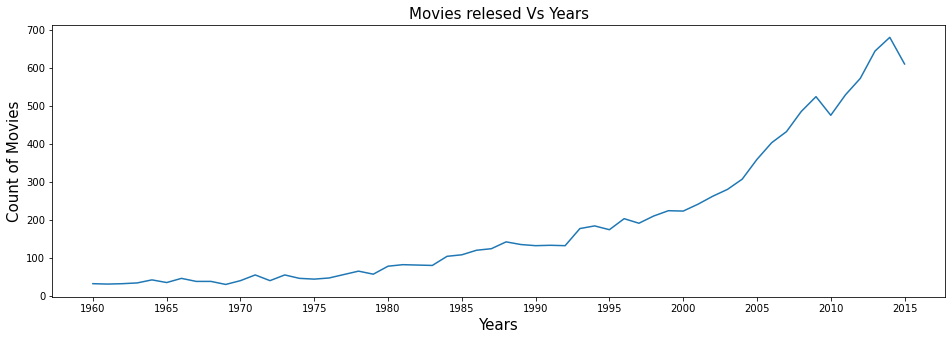

In [47]:
#group of the data according to their release year and count the total number of movies in each year.
# np array used to step evry five year, adjusting figure size
Movies_genres_released=df_TMDB.groupby('release_year').id.count()
Movies_genres_released.plot(xticks = np.arange(1960,2016,5),figsize=(16,5))

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Movies relesed Vs Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Count of Movies',fontsize=15);

In [48]:
#printing Top five relase_year by sort values of Movies_genres_released descendingly.
Movies_genres_released.sort_values(ascending=False)[:5]

release_year
2014    680
2013    644
2015    610
2012    572
2011    529
Name: id, dtype: int64

>It is noticeable that movies productions is on an upward trend, except in 2015 there was decline in number of movies Compared to previous years,So lets first dig in Movies genres to know more about preferd & higest profitable movies kind relased.

### Question 3: Which movies genres need to be focus on ( users vote/profit )?

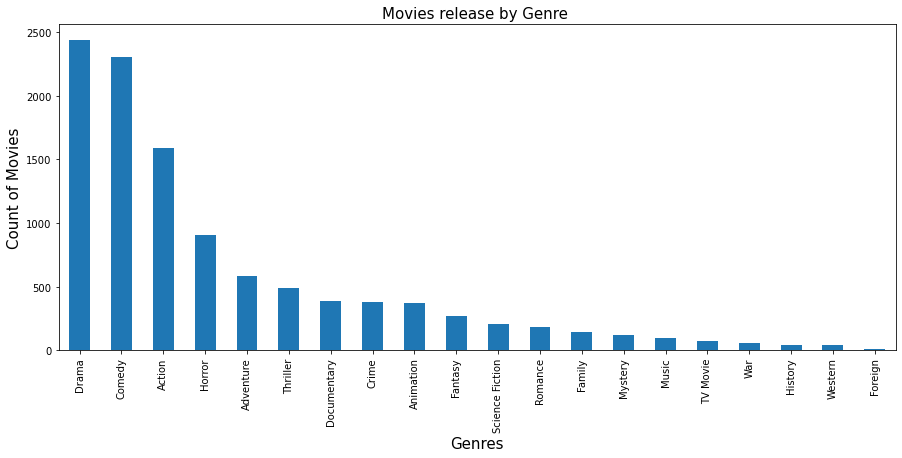

In [49]:
#Bar plot used
#Create group of the data according to release year and count the total number of movies in each year, sorted it descendingly 
Movies_released_genres =df_TMDB.groupby('genres').id.count().sort_values(ascending=False)
#Plot & adjusting figure size
Movies_released_genres.plot(kind="bar",figsize=(15,6));

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Movies release by Genre ',fontsize=15)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Count of Movies',fontsize=15);

>Looks that Drama then comedy are the most release genre, so let's check if it match users votes and the profit or not.

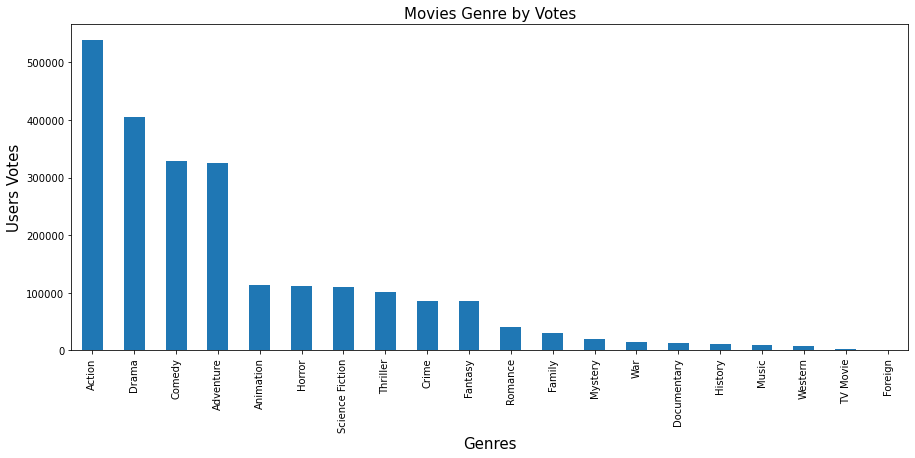

In [50]:
#Bar plot used
#Create group of the data according to genres and sum the vote_count,Sorted it descendingly.
genres_vote_count=df_TMDB.groupby('genres').vote_count.sum().sort_values(ascending=False)
#Plot & adjusting figure size
genres_vote_count.plot(kind="bar",figsize=(15,6));

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Movies Genre by Votes',fontsize=15)
plt.xlabel('Genres' ,fontsize=15)
plt.ylabel('Users Votes',fontsize=15);

>Ok,According to users votes.Drama takes the second position while action movies considered the highest movie genres.so let's have a look to what profit will tell us.


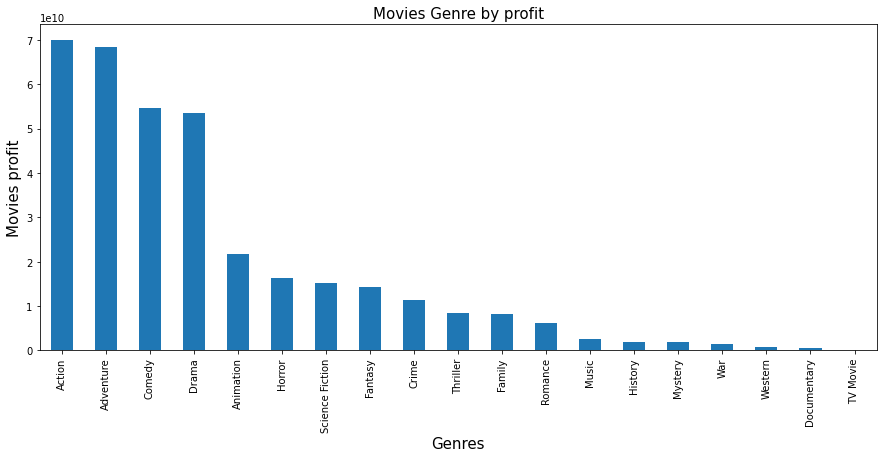

In [51]:
#Bar plot used
#Create group of the data according to genres and sum the profit,Sorted it descendingly.
genres_profit_Year=non_zero_movies.groupby(['genres']).profit.sum().sort_values(ascending=False)
#Plot & adjusting figure size
genres_profit_Year.plot(kind="bar",figsize=(15,6));

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Movies Genre by profit',fontsize=15)
plt.xlabel('Genres' ,fontsize=15)
plt.ylabel('Movies profit',fontsize=15);

>Great, Action movies is the higest profitable. which match with users votes,letsvies  now check another factor..."Movies runtime" 

### Question 4: Which is more common, Long or short moive?

In [52]:
df_TMDB['runtime'].describe()

count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

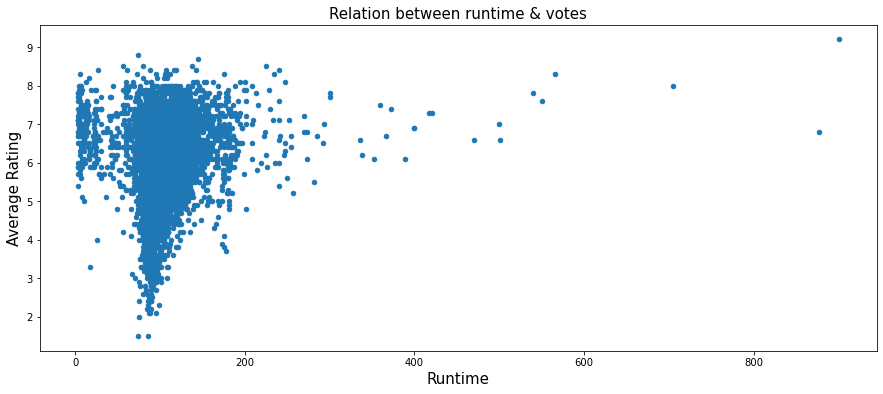

In [53]:
#scatter plot used
#plot relation between runtime & vote_average using scatter plot,adjusting figure size.
df_TMDB.plot(x='runtime', y='vote_average', kind='scatter', figsize=(15,6));

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Relation between runtime & votes',fontsize=15)
plt.xlabel('Runtime',fontsize=15)
plt.ylabel('Average Rating',fontsize=15);

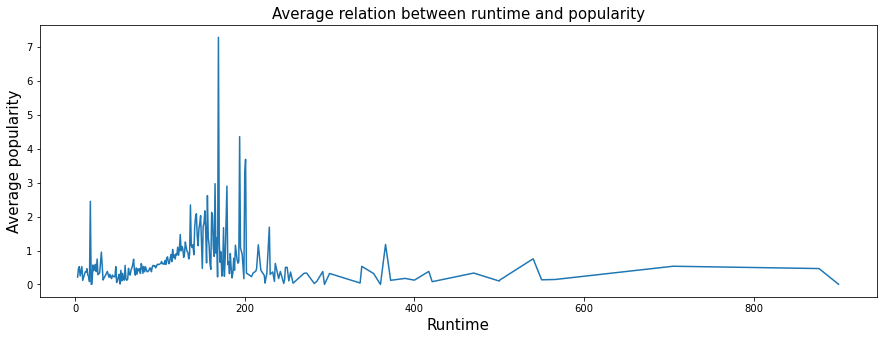

In [54]:
#Create group of the data according to runtime and average popularity.
runtime_popularity_mean=df_TMDB.groupby('runtime').popularity.mean()
#Plot & adjusting figure size
runtime_popularity_mean.plot(figsize=(15,5));
plt.title('Average relation between runtime and popularity',fontsize=15)

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.xlabel('Runtime' ,fontsize=15)
plt.ylabel('Average popularity',fontsize=15);


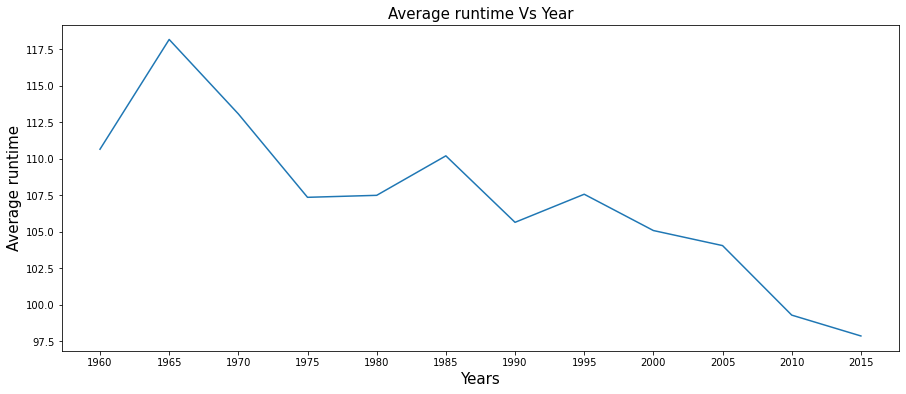

In [55]:

runtime_released_Year=df_TMDB.groupby('release_year').runtime.mean()
runtime_released_Year[range(1960,2016,5)].plot(xticks = np.arange(1960,2016,5),figsize=(15,6))

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Average runtime Vs Year',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Average runtime',fontsize=15);

>According to vote average and average popularity, it's Looks that movies range between 150 and 200 are more popular which is logic as it decrease year by year.

### Question 5: Which Directors are the most successful?

In [56]:
#Create group of the data according to release_year and director and the totL sum of profit.
director_profit_Year=non_zero_movies.groupby(['release_year','director']).profit.sum()

In [57]:
#Sorted it descendingly and printing the top 20
director_profit_Year.sort_values(ascending=False)[:20]

release_year  director            
1977          George Lucas            2.750137e+09
2009          James Cameron           2.586237e+09
1997          James Cameron           2.234714e+09
1973          William Friedkin        2.128036e+09
1975          Steven Spielberg        1.878643e+09
1982          Steven Spielberg        1.767968e+09
1993          Steven Spielberg        1.745499e+09
2015          J.J. Abrams             1.718723e+09
1995          Irwin Winkler           1.551568e+09
1961          Clyde Geronimi          1.545635e+09
1980          Irvin Kershner          1.376998e+09
1967          Wolfgang Reitherman     1.319404e+09
2015          Colin Trevorrow         1.254446e+09
1972          Francis Ford Coppola    1.246626e+09
2012          Joss Whedon             1.234248e+09
2003          Peter Jackson           1.214855e+09
2015          James Wan               1.210949e+09
1983          Richard Marquand        1.182995e+09
2011          David Yates             1.166009e

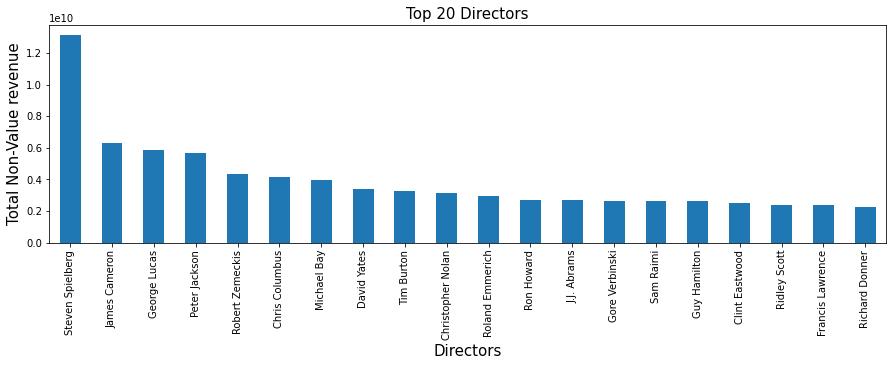

In [58]:
#Create group of the data according to director total sum
director_profit_total=director_profit_Year.groupby('director').sum().sort_values(ascending=False)

#Plot & adjusting figure size the top 20 
director_profit_total[:20].plot(kind ='bar', figsize=(15,4))

#set labels to title, X-axis and Y-axis,Adjusting fontsize
plt.title('Top 20 Directors',fontsize=15)
plt.xlabel('Directors',fontsize=15)
plt.ylabel('Total Non-Value revenue',fontsize=15);

>Its look that Steven Spielberg is the most successful Director in terms of revenue.

<a id='conclusions'></a>
## Conclusions

> The success of films does not necessarily depend on one important factor such as budget, It should be kept in mind that there are other important factors that have been identified from study important factores like users votes , movies profit and popularity

> Movies productions is on an upward trend, except in 2015 there was decline in number of movies Compared to previous years

> Noticed that Drama is the most gean released followed by comedy then action however the most profitable and voted by users was action, But it's ok as log as it lies in the top five.


> Most popular movie runtime preferred by users found between 150 and 200 minutes, however average runtime was 102 and 75% of the released movies was 112 minutes,Take in consideration that runtime decrease year by year.

> It turns out that Steven Spielberg is the director of the most profitable movies released along the last period.


### Limitations

> Dropping missing and Null values in datasets can cause the complication in data handling and analysis, loss of information and efficiency,whic can produce biased results and may end up drawing an inaccurate inference about the data.

> During data cleaning process, I split the data that was separated by '|' into lists,This increased the time in finding results. 